In [49]:
import pathlib
import pickle
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [54]:
DATA_DIR = pathlib.Path.cwd().parent / 'data'
RAW_DATA_DIR = DATA_DIR / 'raw'
watches_data_filepath = RAW_DATA_DIR / 'watches.csv'

In [55]:
# Sanity checks
filesize = watches_data_filepath.stat().st_size
print(f'This file has {filesize} bytes')

This file has 6010 bytes


In [56]:
watches = pd.read_csv(watches_data_filepath, parse_dates=True, header=None, names=['date', 'value'])
print(watches.shape)
print(watches.info())
watches.head()

(198, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    198 non-null    object 
 1   value   198 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.2+ KB
None


,date,value
0,2021/01/01,27408.412483
1,2021/01/10,27645.861601
2,2021/01/20,27679.782904
3,2021/01/28,27985.074627
4,2021/02/07,28188.602442


In [58]:
watches['date'] = pd.to_datetime(watches['date'])
watches.set_index('date', inplace=True)
print(watches.info())
watches.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 198 entries, 2021-01-01 to 2024-05-19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   198 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB
None


,value
date,
2021-01-01,27408.412483
2021-01-10,27645.861601
2021-01-20,27679.782904
2021-01-28,27985.074627
2021-02-07,28188.602442


In [59]:
PROCESSED_DIR = DATA_DIR / 'processed'
PROCESSED_FILEPATH = PROCESSED_DIR / 'watches.pkl'

with open(PROCESSED_FILEPATH, 'wb') as f:
    pickle.dump(watches, f)

<Axes: xlabel='date'>

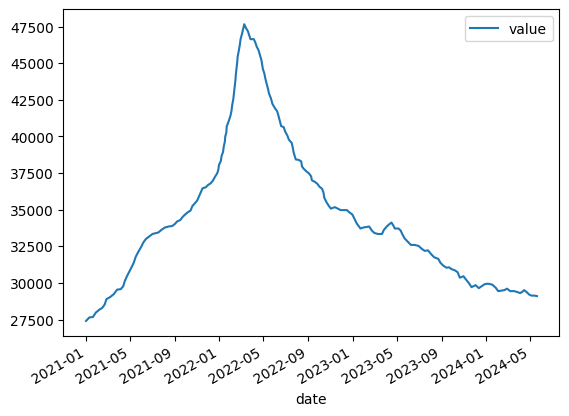

In [60]:
# Plot data
watches.plot()

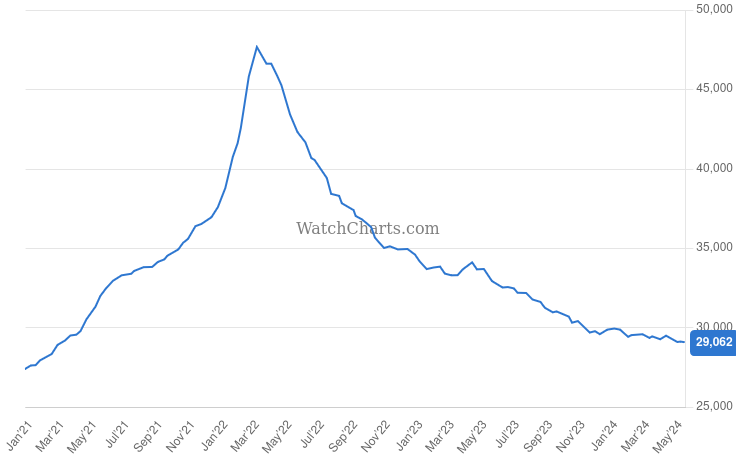

In [62]:
start_date = watches.index.min()
end_date = watches.index.max()
print(f'Tem-se um dataset com {watches.shape[0]} pontos dispersos em {(end_date - start_date).days} dias')
print(f'Atualização de preço a cada {(end_date - start_date).days / watches.shape[0]:.2f} dias, em média')

Tem-se um dataset com 198 pontos dispersos em 1234 dias
Atualização de preço a cada 6.23 dias, em média


In [67]:
ticker = '^SPX'
spx_filepath = RAW_DATA_DIR / f'{ticker}.csv'

if not spx_filepath.exists():
    raw_spx = yf.download(ticker, start=start_date, end=end_date)
    raw_spx.dropna()
    raw_spx.to_csv(RAW_DATA_DIR / f'{ticker}.csv')
else:
    raw_spx = pd.read_csv(spx_filepath, parse_dates=True, index_col='Date')

raw_spx.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,3764.610107,3769.989990,3662.709961,3700.649902,3700.649902,5015000000
2021-01-05,3698.020020,3737.830078,3695.070068,3726.860107,3726.860107,4591020000
2021-01-06,3712.199951,3783.040039,3705.340088,3748.139893,3748.139893,6064110000
2021-01-07,3764.709961,3811.550049,3764.709961,3803.790039,3803.790039,5099160000
2021-01-08,3815.050049,3826.689941,3783.600098,3824.679932,3824.679932,4773040000


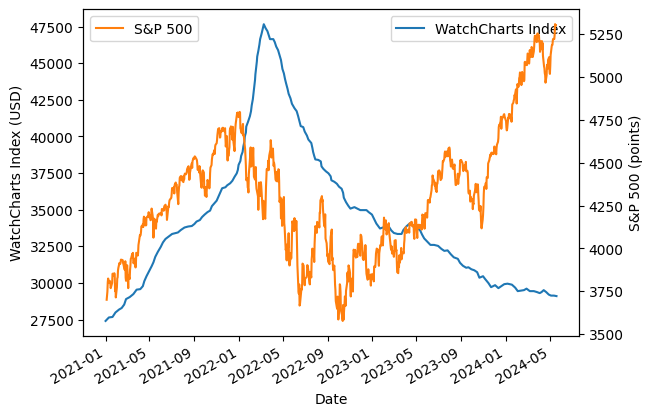

In [75]:
# Plot both graphs together
fig, ax = plt.subplots()
watches.plot(ax=ax)
raw_spx['Adj Close'].plot(ax=ax, secondary_y=True)
ax.set_ylabel('WatchCharts Index (USD)')
ax.right_ax.set_ylabel('S&P 500 (points)')
# Change legend
ax.legend(['WatchCharts Index'])
ax.right_ax.legend(['S&P 500'])
